## Kaggle Competition: Titanic - Machine Learning from Disaster

The goal of this project is to use ML models to predict which passengers survived in the Titanic shipwreck. Data comes from the [Kaggle 'Titanic - Machine Learning from Disaster' competition](https://www.kaggle.com/c/titanic/overview). 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading in the data

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis

It appears that there are several missing values (NaN's) in the dataset. We'll need to figure out what to do with those first before we can proceed with building our ML models.

Let's see which of our features have NaN's first.

In [6]:
titanic.loc[:, titanic.isnull().any() ]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


It appears that our features with missing values are `Age`, `Cabin`, and `Embarked`. Let's visualize how many missing values are in each column.

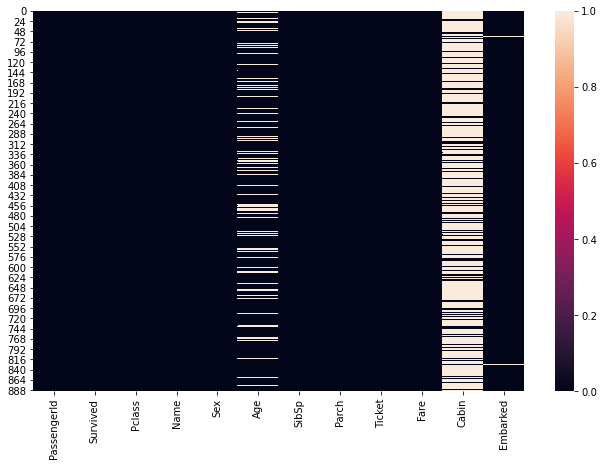

In [7]:
plt.figure(figsize = (11,7))
sns.heatmap(titanic.isnull(), cbar = True)

We can see that a majority of the information in `Cabin` is missing. It might therefore be better off to simply drop the feature entirely since we can't do much with it. As for `Age` and `Embarked`, we still retain enough values where we can still do something useful with them. 

For now, let's proceed with the rest of our EDA. Let's look at the distribution of our 'Survived' target column

In [75]:
[titanic['Survived'].value_counts().values]

[array([549, 340], dtype=int64)]

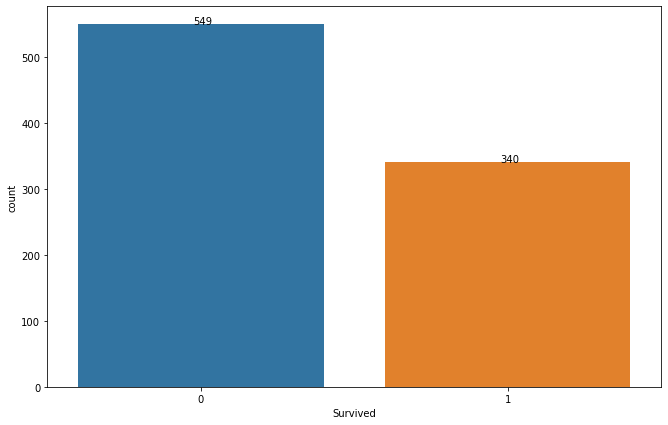

In [81]:
fig = plt.figure(figsize = (11,7))
ax = sns.countplot(x = 'Survived', data = titanic)

for p, label in zip(ax.patches, titanic["Survived"].value_counts().values):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.4))

Sex seems like it might be a significant predictor so let's visualize who survived by sex.

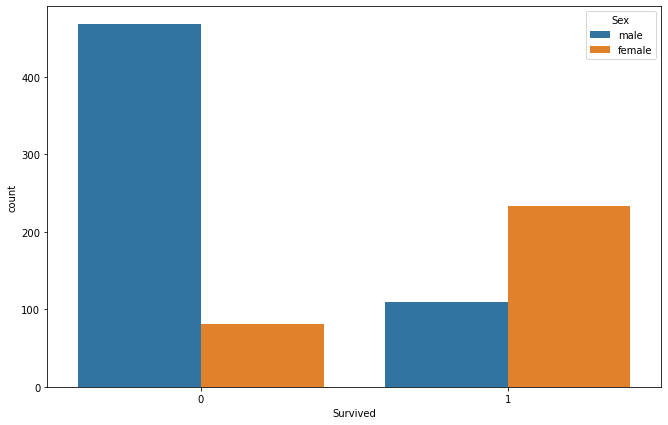

In [8]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic)

It seems that the overwhelming proportion of those who survived were female. Those who didn't survive were overwhelmingly male.

Let's look at who survived by age.

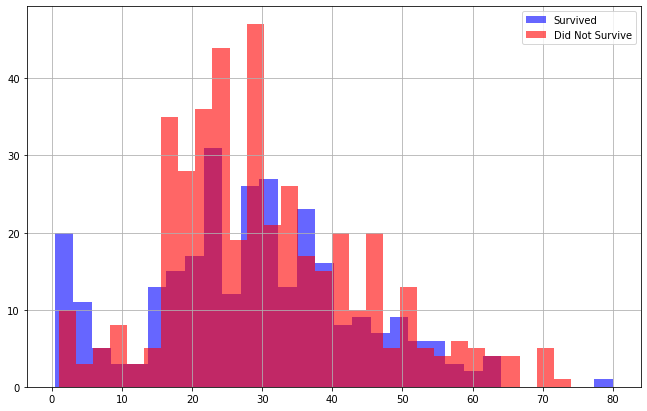

In [9]:
plt.figure(figsize = (11,7))
titanic[titanic['Survived'] == 1]['Age'].dropna().hist(bins = 30, alpha = 0.6, label = 'Survived', color = 'blue')
titanic[titanic['Survived'] == 0]['Age'].dropna().hist(bins = 30, alpha = 0.6, label = 'Did Not Survive', color = 'red')
plt.legend()

Visually, there doesn't appear to be a large difference in ages between those who survived and those who didn't. 

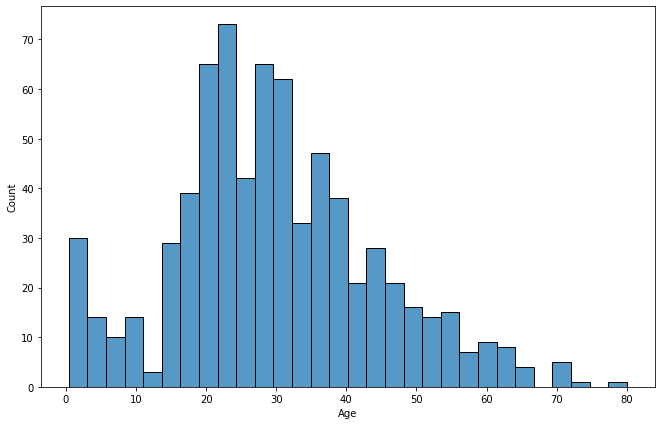

In [10]:
plt.figure(figsize = (11,7))
sns.histplot(titanic['Age'].dropna(), kde = False, bins = 30 )

There were a surprising amount of passengers aged 0 to 10. It seems the majority of passengers were around 20 to 40 years of age.

Let's look at `Sibsp`, the passenger's number of siblings/spouses onboard, and `parch`, the number of children or parents onboard.

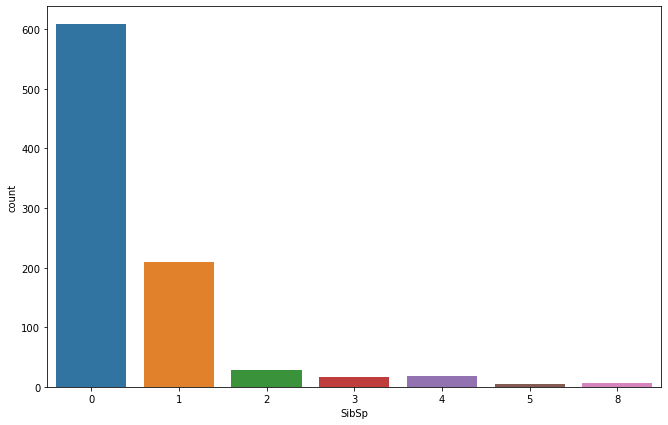

In [11]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'SibSp', data = titanic)

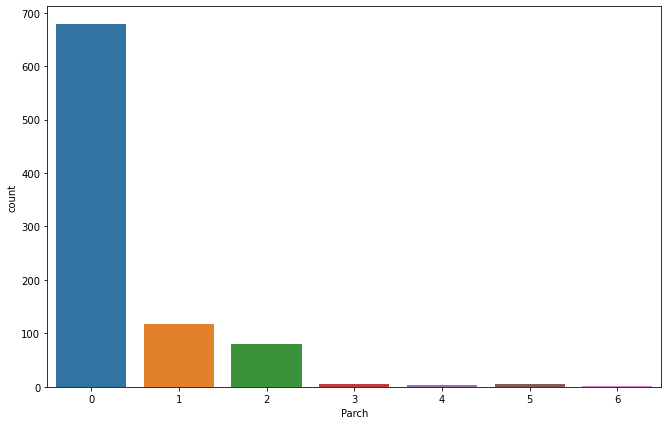

In [12]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'Parch', data = titanic)

The vast majority of passengers traveled by themselves. Some of them had a sibling or spouse onboard. Few traveled with a parent of child. 

Finally, let's take a look at the passenger classes and ticket prices.

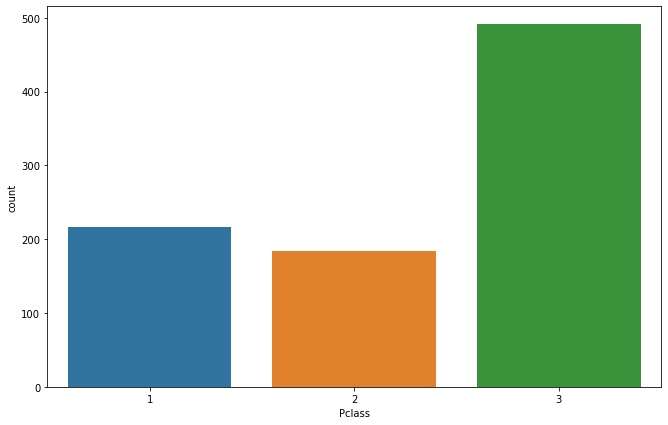

In [13]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'Pclass', data = titanic)

It's interesting that there are more passengers in 1st class than in 2nd class. 3rd class of course composes of most of the passengers. 

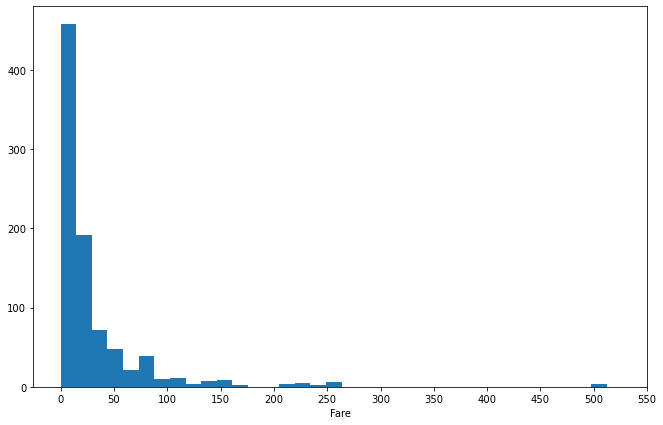

In [14]:
plt.figure(figsize = (11,7))
plt.hist(x = 'Fare', data = titanic, bins = 35)
plt.xlabel('Fare')
plt.xticks(list(np.arange(0,600,50)))
plt.show()

It seems most ticket prices were between $0 and $50, which makes sense that most of the passengers are in 3rd class.

## Data Cleaning

It's now time to deal with missing values in our dataset. First, let's drop the `Cabin` column because it has too many missing values to be useful. While we're at it, let's also drop the 'Name' and 'Ticket' columns since they're all unique string values. Working with these would be difficult and would likely required NLP to glean any useful information.

In [15]:
titanic = titanic.drop(['Cabin', 'Name', 'Ticket'], axis = 1)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


Now, to deal with the missing values in `Age`. We can do some data imputation, or replacing the missing values based on other information in the dataset. Probably the most-related feature in the dataset is `Pclass`, so we can use the average ages in each passenger class to fill in the missing age values. 

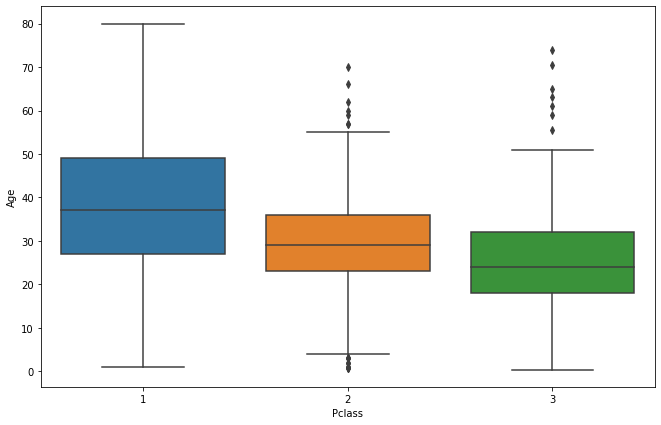

In [16]:
plt.figure(figsize = (11,7))
sns.boxplot(y='Age', x = 'Pclass', data = titanic)

There appears to be a significant difference in the ages of passengers in different class. The wealthier passengers in 1st and 2nd class tend to be older than the passengers in 3rd class.

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return round(titanic[titanic['Pclass'] == 1]['Age'].dropna().mean()) # the average for 1st class
        elif Pclass == 2:
            return round(titanic[titanic['Pclass'] == 2]['Age'].dropna().mean()) # the average for 2nd class
        else:
            return round(titanic[titanic['Pclass'] == 3]['Age'].dropna().mean()) # the average for 3rd class
    else:
        return Age


In [18]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(impute_age, axis = 1)
titanic['Age'].isna().sum()

0

Now for `Embarked`...

In [19]:
titanic['Embarked'].isna().sum()

2

There are only two missing rows so it might be better to just drop these rows.

In [20]:
titanic.dropna(inplace=True)
titanic['Embarked'].isna().sum()

0

We can convert `Sex` and `Embarked` to dummy variables, which is much easier to use with our models.

In [21]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [22]:
final_data = pd.get_dummies(titanic, columns = ['Sex', 'Embarked'], drop_first = True)

In [23]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Sex_male     889 non-null    uint8  
 8   Embarked_Q   889 non-null    uint8  
 9   Embarked_S   889 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


## Model Building

Now that our data has been sufficiently cleaned, we can start with building machine learning models.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = final_data.drop('Survived', axis = 1)
y = final_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

Let's start with a logistic regression model, which is useful for predicting binary outcomes like our `Survived` label. 

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel = LogisticRegression(max_iter = 400)

In [28]:
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

#### Logistic Regression Model Performance Evaluation

In [30]:
print(confusion_matrix(predictions, y_test))
print('\n')
print(classification_report(predictions, y_test))

## ROC Curve
print(roc_auc_score(y_test, logmodel.predict_proba(X_test)[:, 1]))


[[139  25]
 [ 28  75]]


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       164
           1       0.75      0.73      0.74       103

    accuracy                           0.80       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267

0.8545508982035928


#### Tuning our Logistic Regression Model

We can tune our model by adjusting the regularization strength parameter "C", which inversely controls the bias-variance tradeoff in the model. Low values of C will lead to high regularization strength and creating simple models that underfit the data. High values of C will lead to low regularization strength which allows the model to increase its complexity, making it more likely to overfit the data.

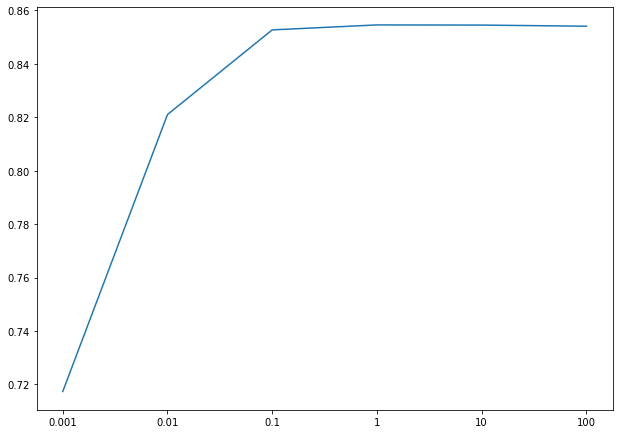

In [31]:
C_param_range = [0.001, 0.01, 0.1, 1, 10, 100]

titanic_auc_table = pd.DataFrame(columns = ['C_parameter', 'Accuracy'])
titanic_auc_table['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    # Apply model to training data
    logmodel = LogisticRegression(C = i, random_state = 42, max_iter = 600)
    logmodel.fit(X_train, y_train)
    
    # Predict with model
    #log_pred = logmodel.predict(X_test)
    
    # Save AUC to table
    titanic_auc_table.iloc[j,1] = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:, 1])
    
    j += 1

# Plotting out our AUC scores
n = np.arange(6)
fig = plt.figure(figsize = (10, 7))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(n, titanic_auc_table['Accuracy'])
axes.xaxis.set_ticks(n)
axes.xaxis.set_ticklabels(C_param_range)
plt.show()

    

It seems that the C = 0.1 is where the gains in performance in the logistic regression model significantly decrease. Therefore, we will set C = 0.1 for the model, which is smaller than the default value of C = 1. The model is therefore less likely to overfit the data and may perform better in other metrics.

In [32]:
logmodel = LogisticRegression(C = 0.1, random_state = 42, max_iter = 600)
logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_test)

print(confusion_matrix(predictions, y_test))
print('\n')
print(classification_report(predictions, y_test))


[[145  28]
 [ 22  72]]


              precision    recall  f1-score   support

           0       0.87      0.84      0.85       173
           1       0.72      0.77      0.74        94

    accuracy                           0.81       267
   macro avg       0.79      0.80      0.80       267
weighted avg       0.82      0.81      0.81       267



We were able to get 1% to 2% increases in performance across our other metrics.

### KNN

We can create a K-Nearest Neighbors model, whcih relies on identifying the closest observations to our "x" data point to label it.

Since KNN predicts the class of a given test observation by identifying the observations that are closest to it, the scale of the variable is highly influential and variables of a large scale have bigger impacts than variables of smaller scales. Therefore, we must scale all the variables first before building our model.

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
final_data.columns.drop('Survived')

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [35]:
scaler = StandardScaler()
scaler.fit(final_data.drop('Survived', axis = 1)) # fit to data, not the target class
scaled_features = scaler.transform(final_data.drop('Survived', axis = 1))

data_scaled = pd.DataFrame(scaled_features, columns = final_data.columns.drop('Survived'))
data_scaled.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-1.732505,0.825209,-0.548070,0.431350,-0.474326,-0.500240,0.735342,-0.307941,0.616794
1,-1.728611,-1.572211,0.666757,0.431350,-0.474326,0.788947,-1.359911,-0.307941,-1.621287
2,-1.724718,0.825209,-0.244363,-0.475199,-0.474326,-0.486650,-1.359911,-0.307941,0.616794
3,-1.720825,-1.572211,0.438977,0.431350,-0.474326,0.422861,-1.359911,-0.307941,0.616794
4,-1.716931,0.825209,0.438977,-0.475199,-0.474326,-0.484133,0.735342,-0.307941,0.616794


In [82]:
X = data_scaled
y = final_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=70)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
training_err = []
testing_err = []
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    
    pred_i_train = knn.predict(X_train)
    pred_i_test = knn.predict(X_test)
    training_err.append(np.mean(pred_i_train != y_train))
    testing_err.append(np.mean(pred_i_test != y_test))

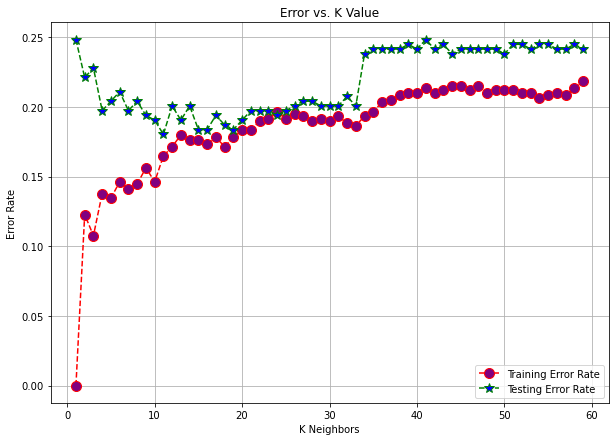

In [85]:
plt.figure(figsize=(10,7))
plt.plot(range(1,60), training_err, color='red', linestyle = 'dashed',  marker = 'o', markerfacecolor = 'purple', markersize = 10,
         label = "Training Error Rate")
plt.plot(range(1,60), testing_err, color='green', linestyle = 'dashed',  marker = '*', markerfacecolor = 'blue', markersize = 10,
         label = "Testing Error Rate")
plt.grid()
plt.xlabel('K Neighbors')
plt.ylabel('Error Rate')
plt.title("Error vs. K Value")
plt.legend()
plt.show()

It seems the optimal K-value occurs at K = 19

In [90]:
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [91]:
print(confusion_matrix(predictions, y_test))
print('\n')
print(classification_report(predictions, y_test))

## ROC Curve
print(roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))

[[164  38]
 [ 16  76]]


              precision    recall  f1-score   support

           0       0.91      0.81      0.86       202
           1       0.67      0.83      0.74        92

    accuracy                           0.82       294
   macro avg       0.79      0.82      0.80       294
weighted avg       0.83      0.82      0.82       294

0.8421783625730994


### Decision Trees

In [40]:
from sklearn.tree import DecisionTreeClassifier
